In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
df=pd.read_csv('product_data.csv')
print("Shape of the dataframe of reviews :",df.shape)


Shape of the dataframe of reviews : (101335, 7)


In [3]:
print("data type of reviews: \n",df.dtypes)

data type of reviews: 
 order_item_id             int64
price                   float64
freight_value           float64
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


In [4]:
def missing_values(x):
    print(x.isnull().sum())
missing_values(df)

order_item_id           0
price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [5]:
def duplicated_values(x):
    print("Total_number_of_duplicated_data",x.duplicated().sum())
duplicated_values(df)

Total_number_of_duplicated_data 25259


In [6]:
df = df.drop_duplicates()
print("Shape of the dataframe of reviews :",df.shape)

Shape of the dataframe of reviews : (76076, 7)


In [7]:
def statistical_summary(x):
    return x.describe()
statistical_summary(df)

order_item_id         price  freight_value  payment_sequential  \
count   76076.000000  76076.000000   76076.000000        76076.000000   
mean        1.266405     84.733013      16.562982            1.118973   
std         0.810884     58.509514       6.184034            0.792954   
min         1.000000      0.850000       0.000000            1.000000   
25%         1.000000     39.000000      12.780000            1.000000   
50%         1.000000     69.900000      15.970000            1.000000   
75%         1.000000    119.000000      19.410000            1.000000   
max        21.000000    270.000000      36.000000           26.000000   

       payment_installments  payment_value  
count          76076.000000   76076.000000  
mean               2.888427     137.780043  
std                2.679622     137.289618  
min                0.000000       0.000000  
25%                1.000000      61.510000  
50%                2.000000     107.780000  
75%                4.000000     172.640000  
max               24.000000    3195.730000

In [8]:
df

order_item_id   price  freight_value  payment_sequential payment_type  \
0                   1   58.90          13.29                   1  credit card   
1                   1  239.90          19.93                   1  credit card   
2                   1  199.00          17.87                   1  credit card   
3                   1   12.99          12.79                   1  credit card   
4                   1  199.90          18.14                   1  credit card   
...               ...     ...            ...                 ...          ...   
101327              1   55.00          34.19                   1   debit card   
101328              2   55.00          34.19                   1   debit card   
101329              3   55.00          34.19                   1   debit card   
101330              4   55.00          34.19                   1   debit card   
101333              1   55.99           8.72                   1  credit card   

        payment_installments  payment_value  
0                          2          72.19  
1                          3         259.83  
2                          5         216.87  
3                          2          25.78  
4                          3         218.04  
...                      ...            ...  
101327                     1         356.76  
101328                     1         356.76  
101329                     1         356.76  
101330                     1         356.76  
101333                     3          64.71  

[76076 rows x 7 columns]

<AxesSubplot:xlabel='payment_type', ylabel='count'>

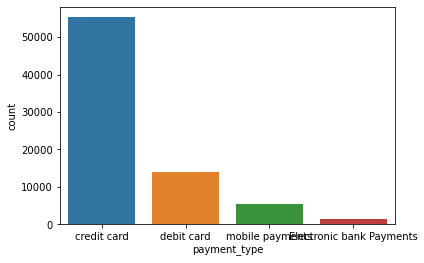

In [9]:
sns.countplot(df['payment_type'])

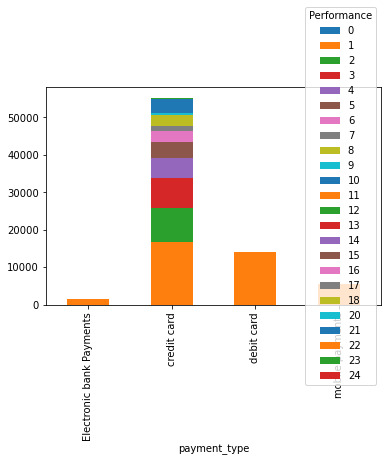

In [10]:
def visualize_payment_type_installments(df):
    pd.crosstab(df['payment_type'],df['payment_installments']).plot.bar(stacked=True)
    plt.legend(loc='right',title='Performance')
    plt.show()
    
visualize_payment_type_installments(df)

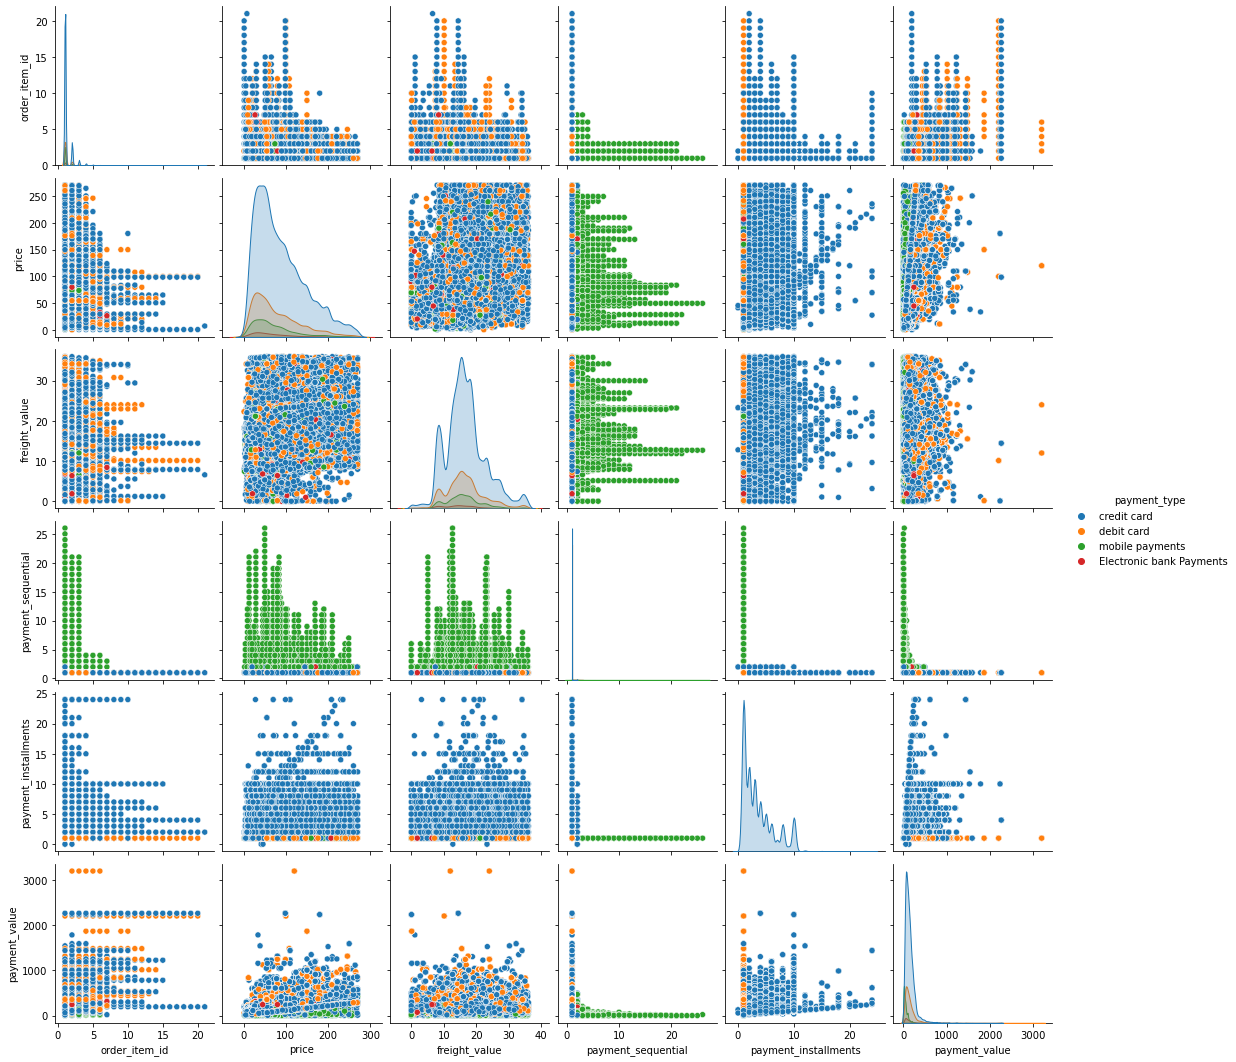

In [11]:
sns.pairplot(df,hue='payment_type')

In [12]:
def mapping_values(x):
    if x == 'credit card':
        return 1
    elif x == 'debit card':
        return 2
    elif x == 'mobile payments':
        return 3
    else :
        return 4 
    
    
df['payment_type']= df['payment_type'].map(mapping_values)
df.head()
        

order_item_id   price  freight_value  payment_sequential  payment_type  \
0              1   58.90          13.29                   1             1   
1              1  239.90          19.93                   1             1   
2              1  199.00          17.87                   1             1   
3              1   12.99          12.79                   1             1   
4              1  199.90          18.14                   1             1   

   payment_installments  payment_value  
0                     2          72.19  
1                     3         259.83  
2                     5         216.87  
3                     2          25.78  
4                     3         218.04

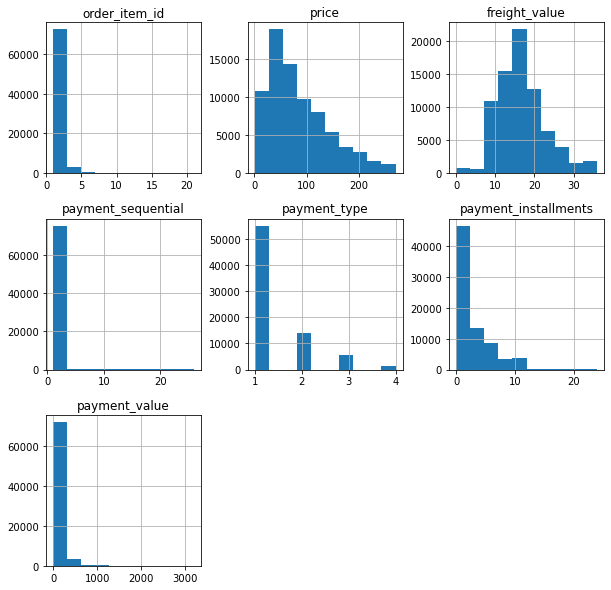

In [13]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='payment_value'>

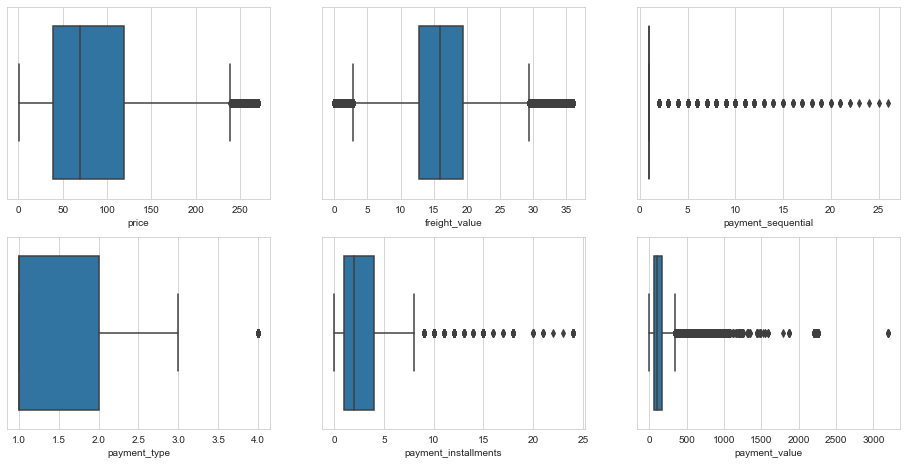

In [14]:
plt.figure(figsize=(16,12))

sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='price',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='freight_value',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='payment_sequential',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='payment_type',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='payment_installments',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='payment_value',data=df)


In [15]:
df = df [df['payment_value']< 2000]

<AxesSubplot:xlabel='payment_value'>

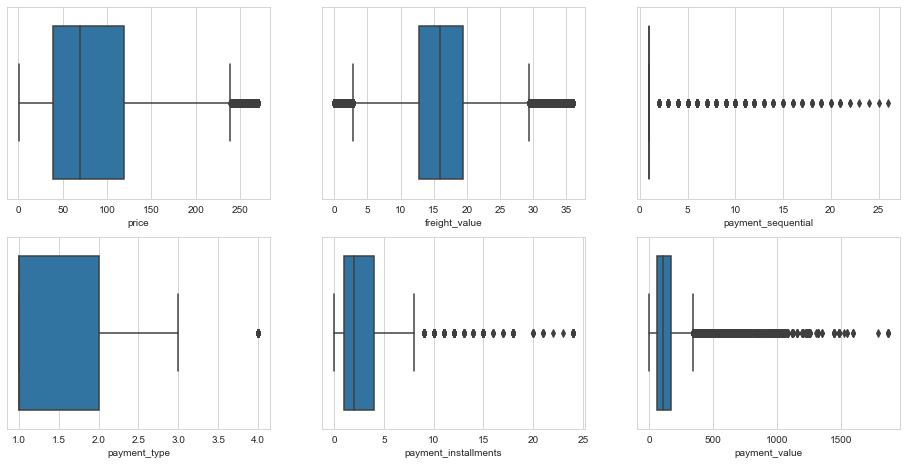

In [16]:
plt.figure(figsize=(16,12))

sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='price',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='freight_value',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='payment_sequential',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='payment_type',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='payment_installments',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='payment_value',data=df)

In [17]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

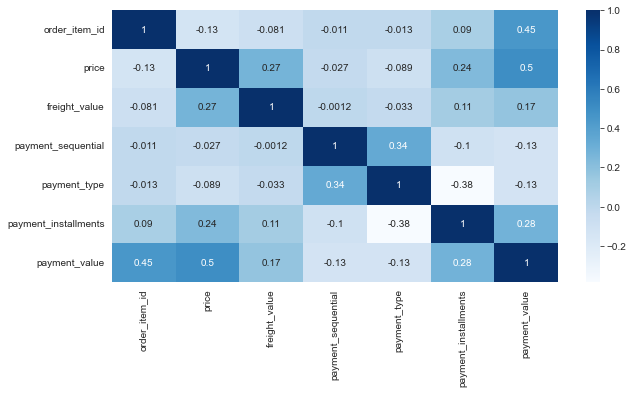

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,cmap="Blues")

In [19]:
# linearity check

import numpy as np


x1 = df['freight_value']
x2 = df['payment_sequential']
x3 = df['payment_type']
x4 = df['payment_installments']
x5 = df['payment_value']
y1 = df['price']


plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
plt.scatter(x1,y1)
plt.title('Linear relation Check')

plt.subplot(3,3,2)
plt.scatter(x2,y1)
plt.title('Linear relation Check')

plt.subplot(3,3,3)
plt.scatter(x3,y1)
plt.title('Linear relation Check')

plt.subplot(3,3,4)
plt.scatter(x4,y1)
plt.title('Linear relation Check')

plt.subplot(3,3,5)
plt.scatter(x5,y1)
plt.title('Linear relation Check')


Text(0.5, 1.0, 'Linear relation Check')

In [20]:
# shapiro test -normality check

from scipy.stats import shapiro, levene

for col in df.columns:
    a = shapiro(df[col])
    if (a[1]<= 0.05):
        print(col,": not normal, p-value:\n", round(a[1],3))
    else:
        print(col,": normal, p-value:\n", round(a[1],3))

order_item_id : not normal, p-value:
 0.0
price : not normal, p-value:
 0.0
freight_value : not normal, p-value:
 0.0
payment_sequential : not normal, p-value:
 0.0
payment_type : not normal, p-value:
 0.0
payment_installments : not normal, p-value:
 0.0
payment_value : not normal, p-value:
 0.0


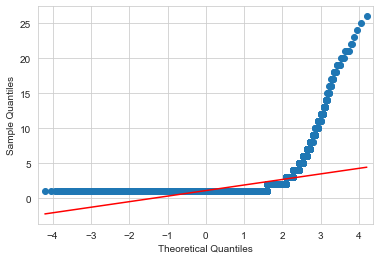

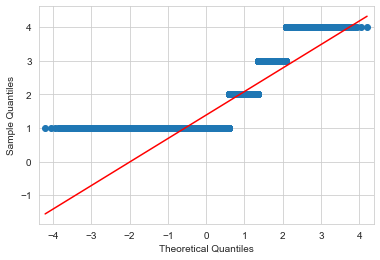

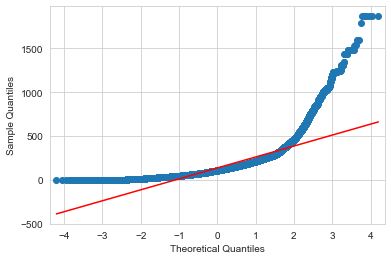

In [21]:
# qq plot normality check

from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

seed(1)


qqplot(df['price'], line='s')
pyplot.show()


qqplot(df['freight_value'], line='s')
pyplot.show()


qqplot(df['payment_sequential'], line='s')
pyplot.show()


qqplot(df['payment_type'], line='s')
pyplot.show()


qqplot(df['payment_installments'], line='s')
pyplot.show()


qqplot(df['payment_value'], line='s')
pyplot.show()

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop('price', axis =1)

vif = pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.round(1)

VIF FACTOR              Features
0         4.1         order_item_id
1         5.4         freight_value
2         3.3    payment_sequential
3         4.9          payment_type
4         2.4  payment_installments
5         3.1         payment_value

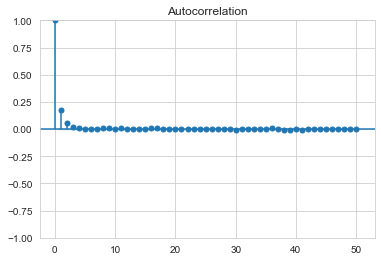

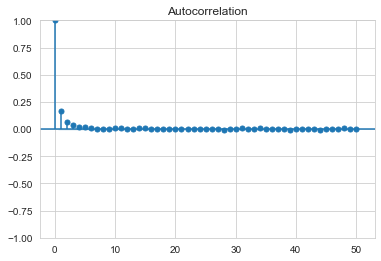

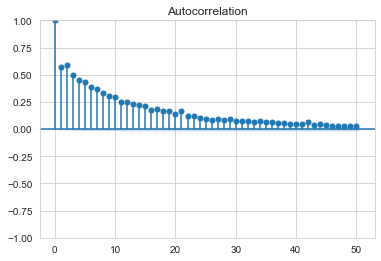

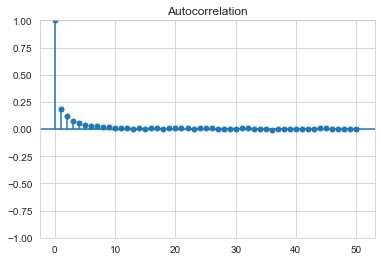

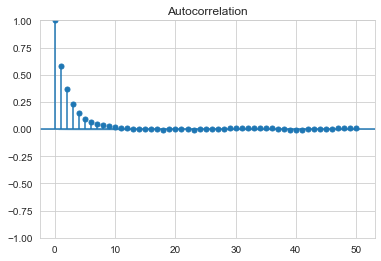

In [23]:
# autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['price'],lags = 50)
pyplot.show()

plot_acf(df['freight_value'],lags = 50)
pyplot.show()

plot_acf(df['payment_sequential'],lags = 50)
pyplot.show()

plot_acf(df['payment_type'],lags = 50)
pyplot.show()

plot_acf(df['payment_installments'],lags = 50)
pyplot.show()

plot_acf(df['payment_value'],lags = 50)
pyplot.show()

<AxesSubplot:xlabel='price', ylabel='payment_value'>

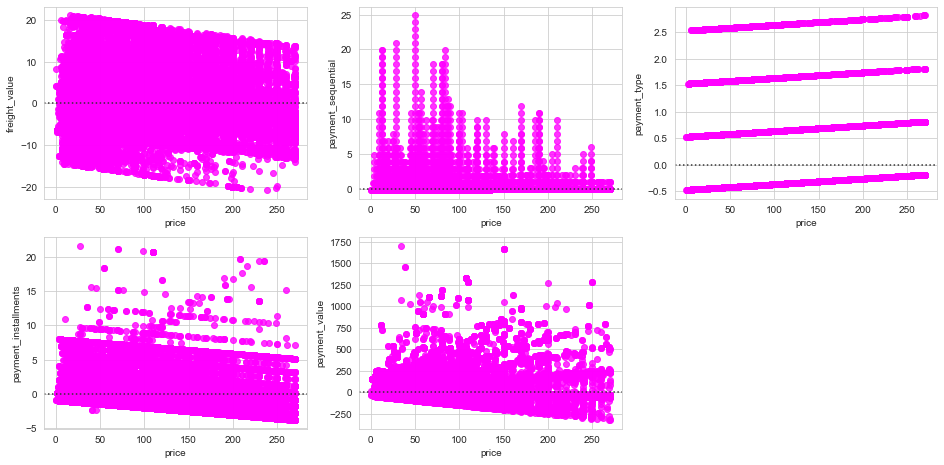

In [24]:
# homoscedasticity
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.residplot(df['price'], df['freight_value'], color = 'magenta')

plt.subplot(3,3,2)
sns.residplot(df['price'], df['payment_sequential'], color = 'magenta')

plt.subplot(3,3,3)
sns.residplot(df['price'], df['payment_type'], color = 'magenta')

plt.subplot(3,3,4)
sns.residplot(df['price'], df['payment_installments'], color = 'magenta')

plt.subplot(3,3,5)
sns.residplot(df['price'], df['payment_value'], color = 'magenta')

In [25]:
y = df['price']
df.drop('price', axis=1, inplace=True)
X=df.copy()

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(53217, 6) (22808, 6) (53217,) (22808,)


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg = reg.fit(X_train,y_train)
y_pred_LR = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_LR)
rmse = mse**.5

print("Mean Square error for Linear regression",mse)
print("Root Mean Square error for Linear regression", rmse)
print('Linear_regression_score R2 Value is',r2_score(y_test,y_pred_LR)*100)
print('Linear regression Adjusted R2 value is',1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Mean Square error for Linear regression 1927.469650368266
Root Mean Square error for Linear regression 43.902957193886905
Linear_regression_score R2 Value is 43.68093960309331
Linear regression Adjusted R2 value is 0.43446762862295596


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
y_pred_LR = grid.predict(X_test)

mse = mean_squared_error(y_test, y_pred_LR)
rmse = mse**.5

print("Mean Square error for Linear regression",mse)
print("Root Mean Square error for Linear regression", rmse)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"% np.mean((grid.predict(X_test) - y_test) ** 2))

Mean Square error for Linear regression 1927.469650368266
Root Mean Square error for Linear regression 43.902957193886905
r2 / variance :  0.43360730377999246
Residual sum of squares: 1927.47


In [39]:
# ordinary least square method [OLS]
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())





                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                          3.808e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:52:12   Log-Likelihood:                     -2.7785e+05
No. Observations:               53217   AIC:                                  5.557e+05
Df Residuals:                   53211   BIC:                                  5.558e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
from sklearn.ensemble import RandomForestRegressor

RF_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF_regressor.fit(X_train,y_train)

y_pred_RF=RF_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_RF)
rmse = mse**.5

print(mse)
print(rmse)
print('Random forest score R2 Value is',r2_score(y_test,y_pred_RF)*100)
print('Random Forest Adjusted R2 value is',1 - (1-RF_regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))



790.7548005259326
28.120362738164182
Random forest score R2 Value is 76.89480228056766
Random Forest Adjusted R2 value is 0.9678730031945706


In [41]:
from sklearn.model_selection import GridSearchCV

grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}


CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)
print(CV_rfr.best_params_)

RF_regressor = RandomForestRegressor(max_depth= 7, max_features= 'sqrt',n_estimators= 200, random_state= 18)
RF_regressor.fit(X_train,y_train)

y_pred_RF=RF_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_RF)
rmse = mse**.5

print("Mean Square error for grid search RF",mse)
print("Root Mean Square error for grid search RF", rmse)
print('Random forest score R2 Value is',r2_score(y_test,y_pred_RF)*100)
print('Random Forest Adjusted R2 value is',1 - (1-RF_regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))



{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 18}
Mean Square error for grid search RF 1052.4509412152477
Root Mean Square error for grid search RF 32.44150029229918
Random forest score R2 Value is 69.2482586629792
Random Forest Adjusted R2 value is 0.6992409829908495


In [42]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=7)
reg.fit(X_train,y_train)
y_pred_DT = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_DT)
rmse = mse**.5
print("Mean Square error for grid search RF",mse)
print("Root Mean Square error for grid search RF", rmse)
print('Decision tree score R2 value is',r2_score(y_test,y_pred_DT)*100)
print('Decision Tree Adjusted R2 value is',1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Mean Square error for grid search RF 971.4494716171408
Root Mean Square error for grid search RF 31.168084182656155
Decision tree score R2 value is 71.61505424788626
Decision Tree Adjusted R2 value is 0.7314095522644661


In [43]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1.0)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print('Lasso R2 value is',r2_score(y_test,y_pred)*100)
print('Lasso Adjusted R2 value is',1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Lasso R2 value is 21.957504653589243
Lasso Adjusted R2 value is 0.22187590843703964
